In [2]:
import pathlib
import os

import h5py
import pandas as pd
import json
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import dask.array as da
import dask.dataframe as dd
import skimage 
from glob import glob

import cloudpickle
import sklearn
from sklearn.linear_model import LinearRegression as LinReg


import SessionTools.two_photon as st2p


%load_ext autoreload
%autoreload 2 

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


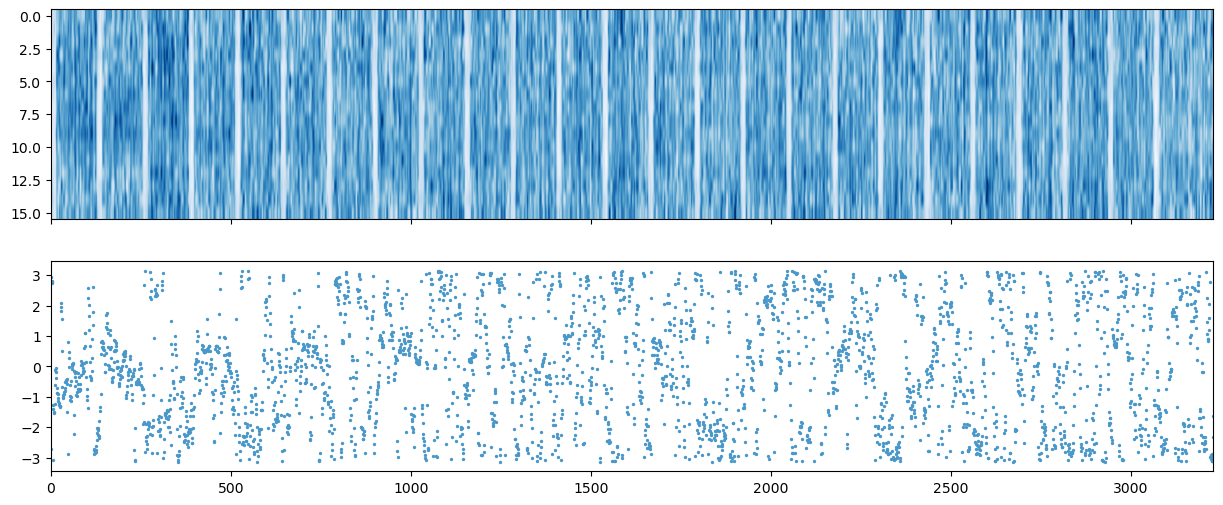

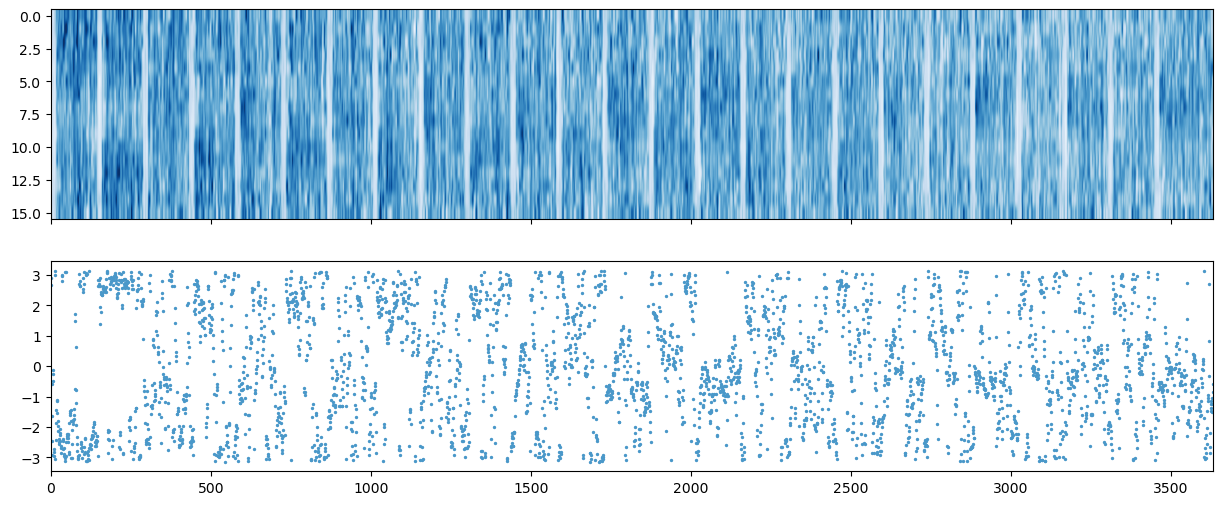

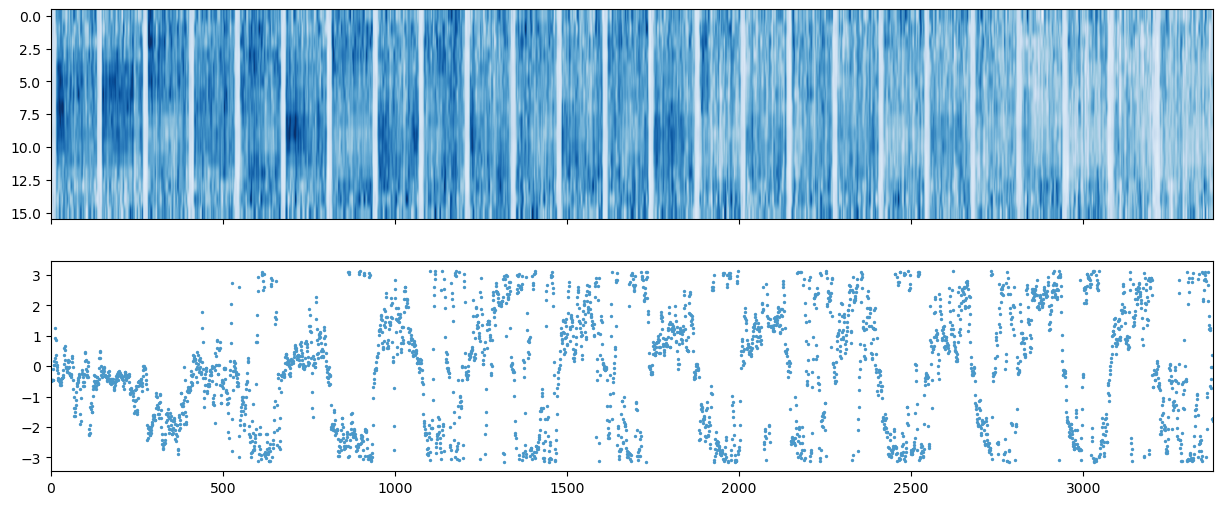

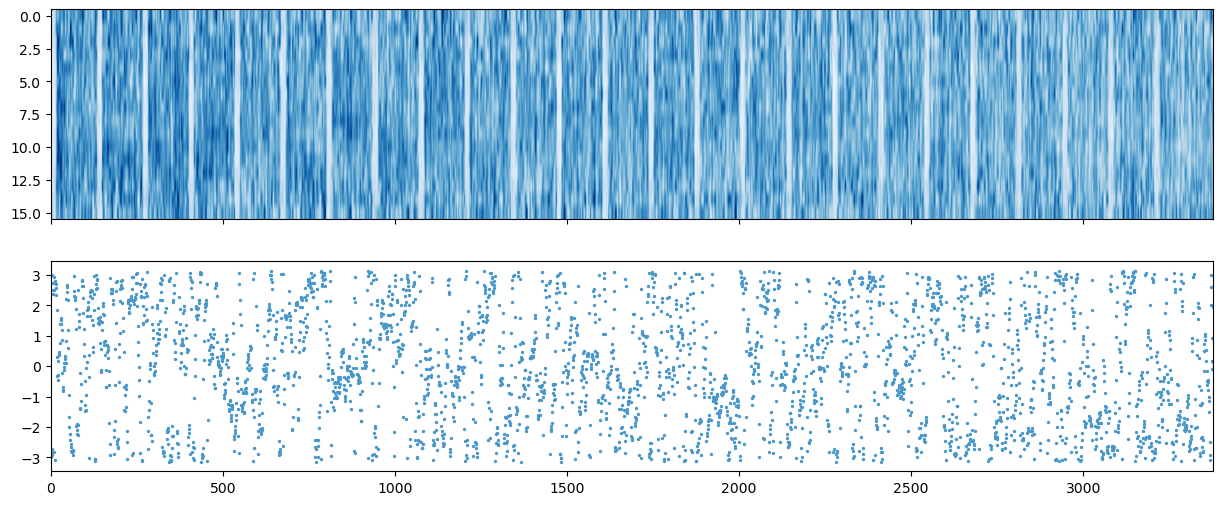

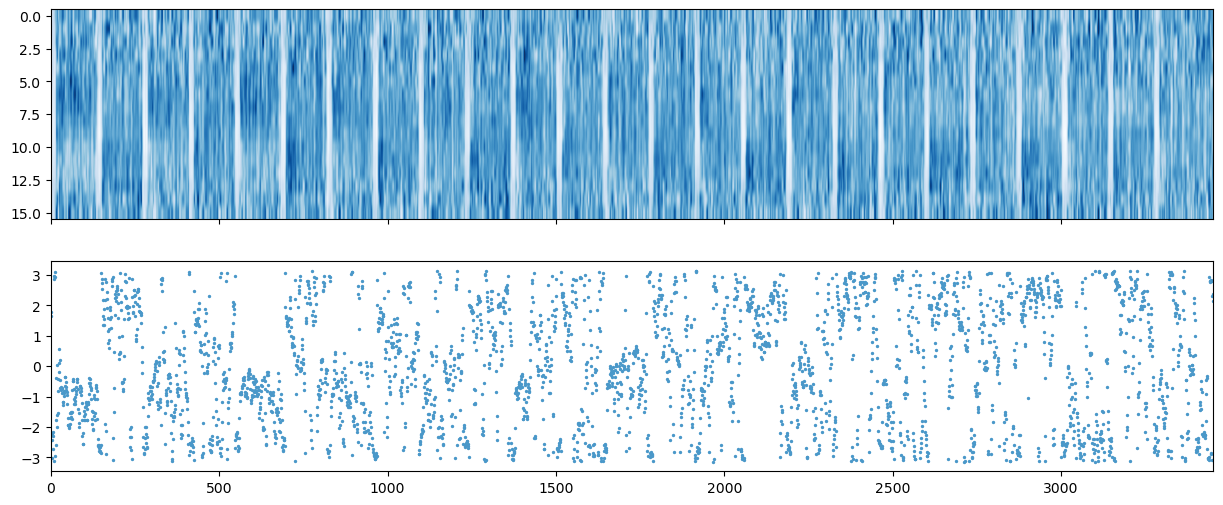

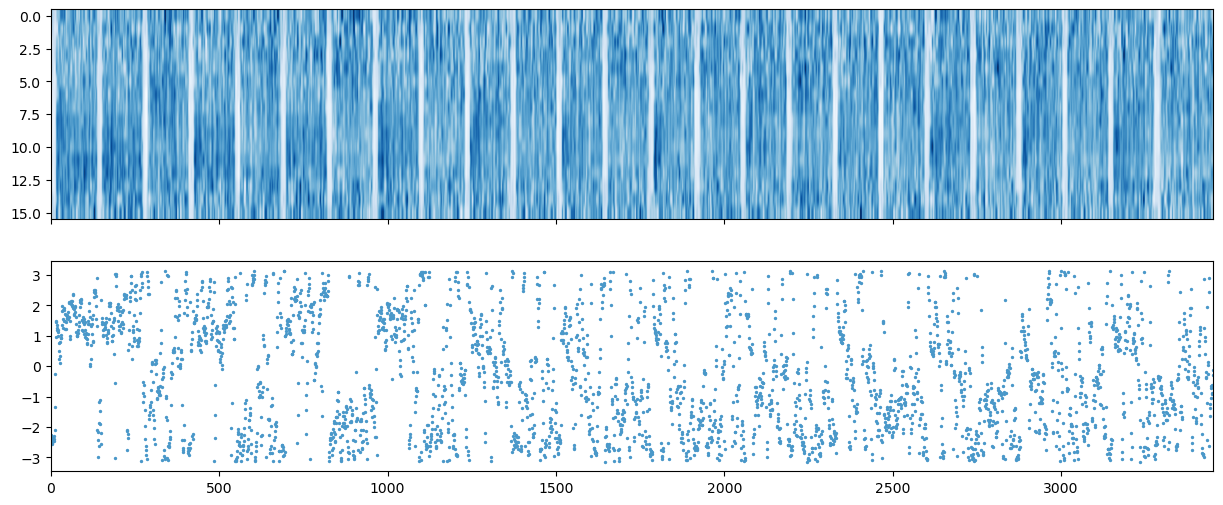

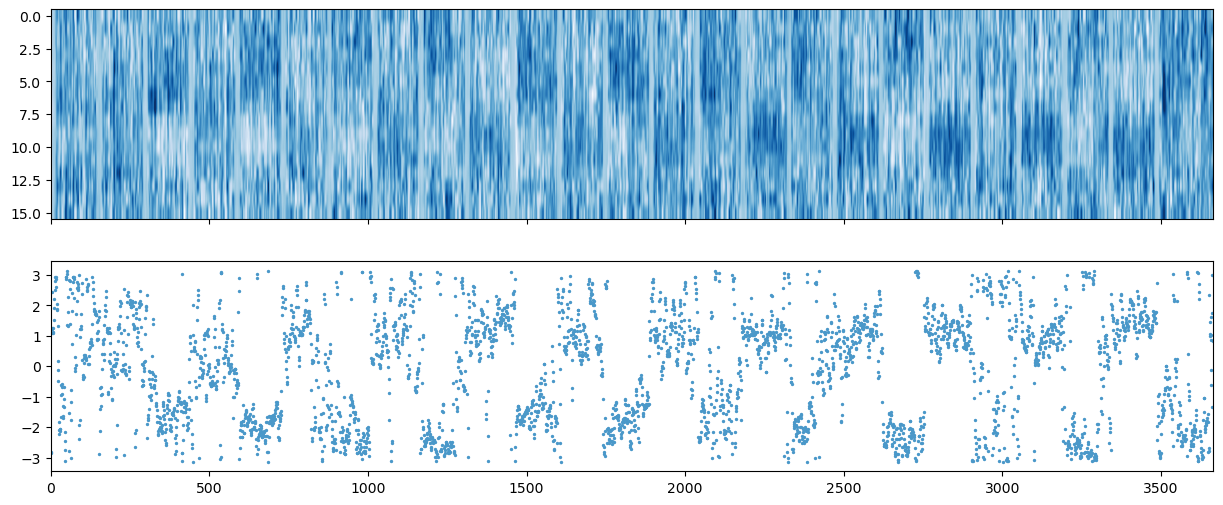

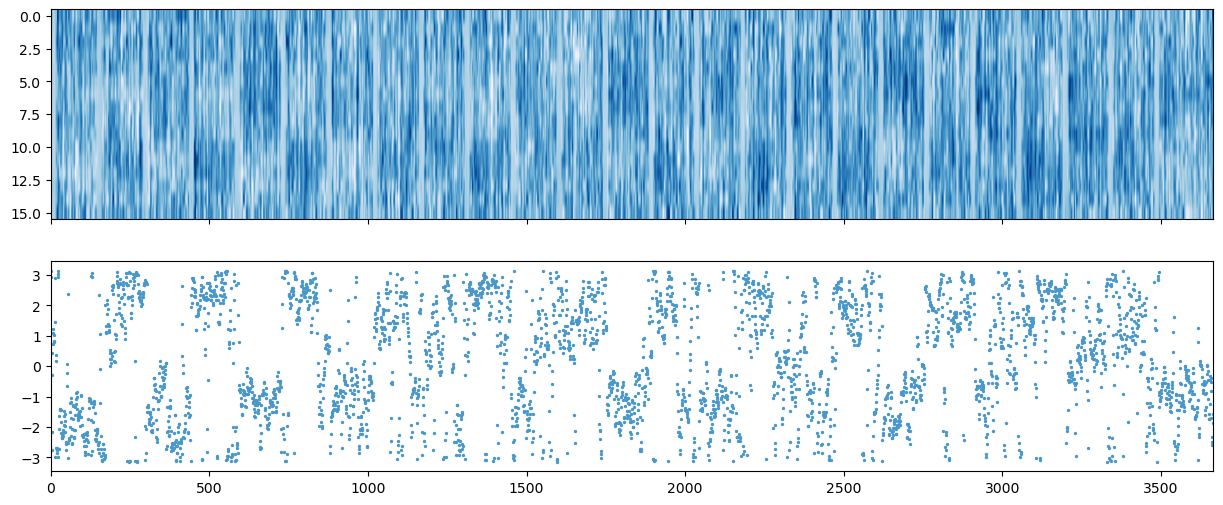

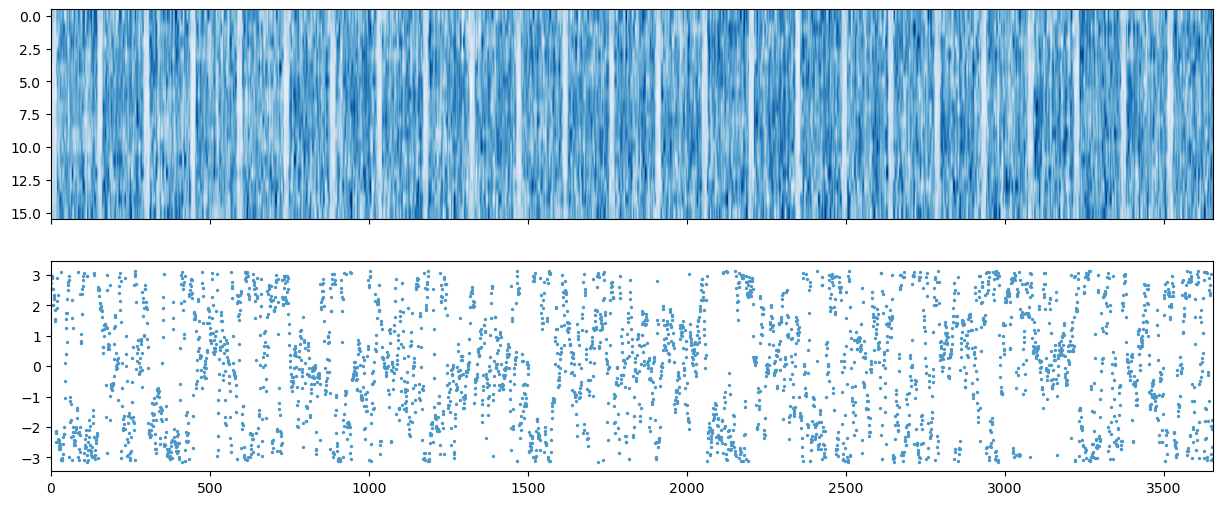

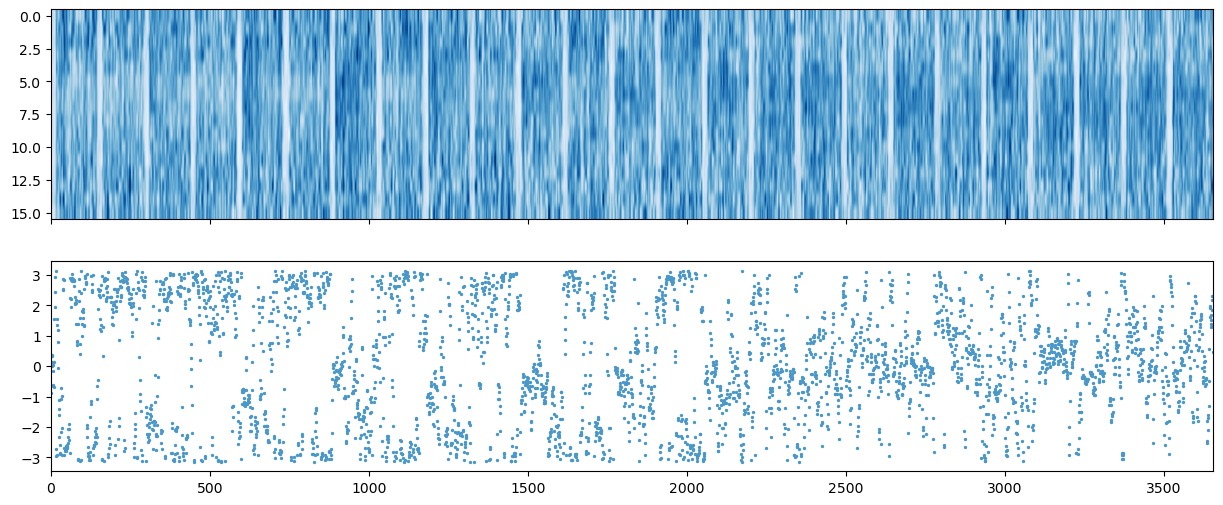

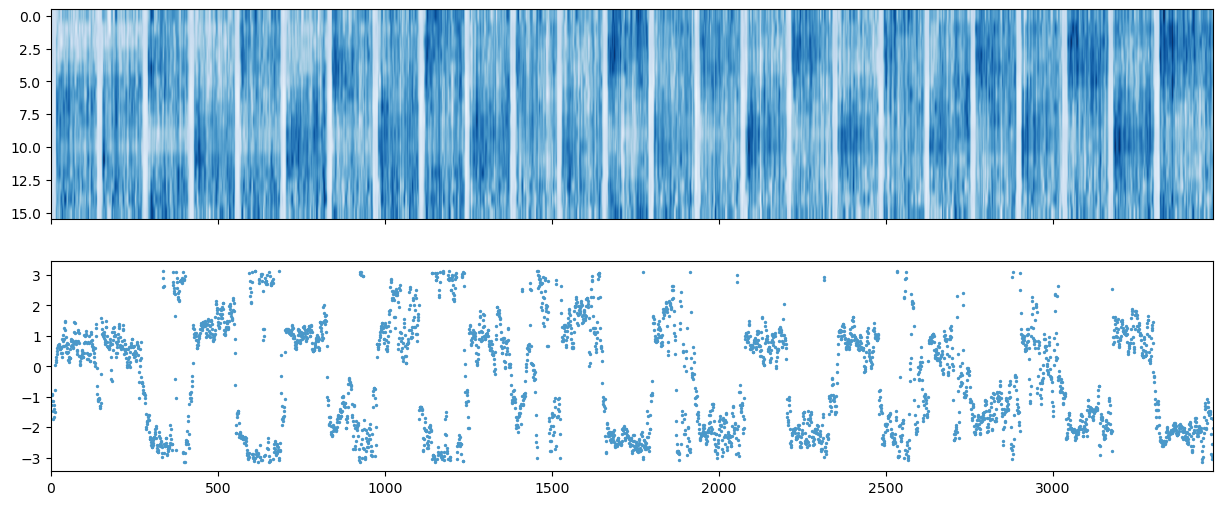

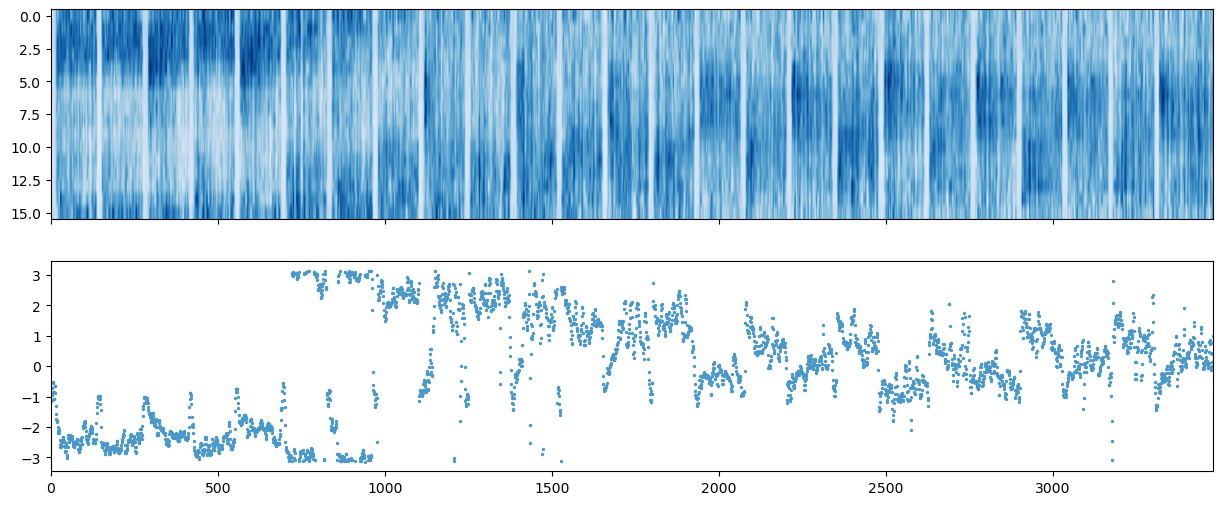

In [4]:
genotype = "R60D05LexA_jGCaMP7f_EL_CsChrimsontdT"
basedir = pathlib.Path(f'/media/mplitt/SSD_storage/2PData/{genotype}')

data_list = []
for date_dir in basedir.glob('*'):
    date = date_dir.stem
    for fly_dir in date_dir.glob('fly*'): 
        fly = fly_dir.stem
        
        for sess_dir in fly_dir.glob("*"):
            if sess_dir.is_dir() and "SingleImage" not in sess_dir.stem:
                sess = sess_dir.stem
                
                sess_pkl_dir = f'/media/mplitt/SSD_storage/2P_scratch/{genotype}/{date}/{fly}/{sess}/sess.pkl'
                with open(sess_pkl_dir,'rb') as f:
                    data = cloudpickle.load(f)
                    
                fig, ax = plt.subplots(2,1, sharex=True, figsize = [15,6])
                ax[0].imshow(data['dff'], aspect='auto', cmap = 'Blues', vmin=-3, vmax=3)
                x = np.arange(data['dff'].shape[1])
                ax[1].scatter(x,np.angle(data['dff_complex'].mean(axis=0)),s=2, color=plt.cm.Blues(.6))


In [ ]:

for data in data_list:
    fig, ax = plt.subplots()
    ax.imshow(data['dff'])
    ax.title('
        
        